# RE-EDS - PEOE - Energy Offset Estimation


In [7]:
#Imports
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import reeds
from pygromos.files import repdat, imd
from reeds.function_libs.analysis import visualisation as vis
from reeds.function_libs.analysis import analysis, file_management


vis.figsize = [16,9]



## Parse Data

In [9]:
#Define data path:
in_imd_path = "/cluster/work/igc/bschroed/REEDS/CHK1/complex_d5/c_eoff/input/repex_eoff.imd"

data_dir = "/cluster/work/igc/bschroed/REEDS/CHK1/complex_d5/c_eoff/analysis/data"
out_prefix = "CHK1_disres5_complex_eoff_energies"

In [13]:
#parse
energy_trajectories = file_management.parse_csv_energy_trajectories(data_dir, out_prefix)
imd_file = imd.Imd(in_imd_path)

## Estimate Offsets

converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps


REEDS - Eoff Estimation:



	Energy Offsets for each Replica

| S	| e1 | e2 | e3 | e4 | e5 | iterations |
|---	|--- |---  |---  |---  |--- |--- |
|1.0000	|0.0 |	7.2231 |	123.794 |	-95.6342 |	-209.2493 	|	1|
|0.7500	|0.0 |	7.2231 |	116.9158 |	-101.6541 |	-209.2493 	|	1|
|0.5620	|0.0 |	7.2215 |	59.011 |	-120.676 |	-209.2493 	|	1|
|0.4220	|0.0 |	7.2219 |	59.0114 |	-120.6756 |	-209.2489 	|	1|
|0.3160	|0.0 |	6.8981 |	56.6969 |	-118.8075 |	-209.2485 	|	1|
|0.2370	|0.0 |	6.894 |	56.6928 |	-118.79

TypeError: unsupported operand type(s) for -: 'list' and 'float'

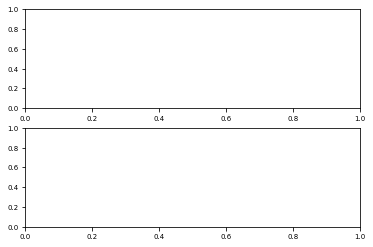

In [24]:
initial_Eoff_guess = [0 for x in range(int(imd_file.REPLICA_EDS.NUMSTATES))]
s_values = list(map(float, imd_file.REPLICA_EDS.RES))
out_path = []
pot_tresh= 0
frac_tresh = [0.9]

eoff_statistic = analysis.estimate_Eoff(ene_ana_trajs=energy_trajectories, 
                                        Eoff=initial_Eoff_guess, s_values=s_values,
                                        pot_tresh=pot_tresh, frac_tresh=frac_tresh,
                                       out_path=".")

## Visualize Results

In [23]:
eoff_statistic

NameError: name 'eoff_statistic' is not defined